In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


In [9]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

Asking right Questions

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train['Embarked'].fillna('S',inplace=True)

In [16]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [23]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [18]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [21]:
test['Embarked'].fillna('S',inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [28]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [34]:
train['Age'][train['Age'].isnull()]=train_age

/var/folders/kb/f1k4_th17h992yvkrm2v50d40000gn/T/ipykernel_13308/4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [35]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
test['Age'][test['Age'].isnull()]=test_age

/var/folders/kb/f1k4_th17h992yvkrm2v50d40000gn/T/ipykernel_13308/3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [37]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Eda

In [38]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [39]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [40]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

/var/folders/kb/f1k4_th17h992yvkrm2v50d40000gn/T/ipykernel_13308/1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

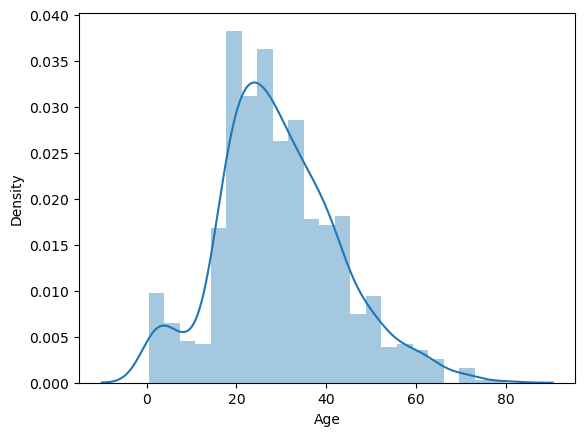

In [43]:
sns.distplot(train['Age'])

In [44]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [59]:
train['family']=train['SibSp']+train['Parch']+1
test['family']=test['SibSp']+test['Parch']+1

In [46]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [49]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>2 and number<5:
        return "Medium"
    else:
        return "Large"

In [50]:
train['family_size']=train['family'].apply(cal)

In [51]:
test['family_size']=train['family'].apply(cal)

In [60]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Large
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Large
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Large
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [62]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,Large
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,Large
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,Large
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,Alone


In [63]:
passengerId=test['PassengerId'].values

In [83]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True)

In [68]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [69]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [88]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

# Model Train

In [89]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,1,0
1,1,38.0,71.2833,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,1,0
4,0,35.0,8.0500,0,1,1,0,1,0,0


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [92]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred=classifier.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8156424581005587

In [95]:
xf=test.iloc[:,:].values


In [96]:
y_final=classifier.predict(xf)

In [97]:
finaldf=pd.DataFrame()


In [101]:
finaldf['PassengerId']=passengerId
finaldf['Survived']=y_final

In [103]:
finaldf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
